### Run the 2 cells below before you start 

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load dataset
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
target_names = list(bc.target_names)
print(target_names)

# Put data into datarame
df = pd.DataFrame(bc.data,columns=bc.feature_names)

# Add dependent variable
df['Benign'] = bc.target
df

['malignant', 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [2]:
# Dataset description - unique to sklearn datasets
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

1. In the cell below, display the number of non-null entries for each column and the datatype for each column.  (hint: is there an easy function that does this in a simple command?)  Are there any null values?

In [3]:
df.info()

# There are no null values - all columns have the same number of entries as the RangeIndex.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

2. In the cell below, display the count, mean, min, and max for each column. (hint: is there an easy function that does this in a simple command?)

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


3. Split the data into a training and testing set with 25% of data being used as a test set.

In [5]:
Y=df.pop('Benign')
X=df.copy()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=35)

4. Run the cell below.  Are there any models that overfit the training data?  Why can we use the Perceptron and Logistic Regression models (hint: what possible values does our dependent variable take?)  How many clusters are we grouping the data into with our KNN model?

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

print("KNN results:")
knn = KNeighborsClassifier(n_neighbors = 6)                  
knn.fit(x_train, y_train)                                    
knn_train_acc = knn.score(x_train, y_train)
knn_test_acc = knn.score(x_test, y_test)
print ('kNN training acuracy= ',knn_train_acc)
print('kNN test accuracy= ',knn_test_acc)

print("\nSVM results:")
svc = SVC()                                                  
svc.fit(x_train, y_train)                                    
svc_train_acc = svc.score(x_train, y_train)
svc_test_acc = svc.score(x_test, y_test)
print ('SVM training acuracy= ',svc_train_acc)
print('SVM test accuracy= ',svc_test_acc)

print("\nLogistic results:")
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_train_acc = logreg.score(x_train, y_train)
logreg_test_acc = logreg.score(x_test, y_test)
print ('Logistic Regression training acuracy= ',logreg_train_acc)
print('Logistic Regression test accuracy= ',logreg_test_acc)

print("\nPerceptron results:")
perceptron = Perceptron(max_iter=20)
perceptron.fit(x_train, y_train)
perceptron_train_acc = perceptron.score(x_train, y_train)
perceptron_test_acc = perceptron.score(x_test, y_test)
print ('perceptron training acuracy= ',perceptron_train_acc)
print('perceptron test accuracy= ',perceptron_test_acc)

# No issues with overfitting, all the models have similiar testing and training accuracy.
# We can issue logistic regression and perceptron because our dependent variable is binary,
# it can only take on two values (Benign and Malignant).
# We are grouping the data into 6 clusters with our KNN model.

KNN results:
kNN training acuracy=  0.9366197183098591
kNN test accuracy=  0.951048951048951

SVM results:
SVM training acuracy=  0.9061032863849765
SVM test accuracy=  0.951048951048951

Logistic results:
Logistic Regression training acuracy=  0.9553990610328639
Logistic Regression test accuracy=  0.965034965034965

Perceptron results:
perceptron training acuracy=  0.903755868544601
perceptron test accuracy=  0.916083916083916


5. Run the cell below.  Do any models overfit their training data?  Why are we using a classifier model as opposed to a regression model?

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

print("CART results:")
cart = DecisionTreeClassifier(random_state=12,max_depth=4, min_samples_split=10)
cart.fit(x_train, y_train)
train_acc = cart.score(x_train, y_train)
test_acc = cart.score(x_test, y_test)
y_pred_cart = cart.predict(x_test)
print('CART training acuracy= ',train_acc)
print('CART test accuracy= ',test_acc)

print("\nRandom Forest results:")
random_forest = RandomForestClassifier(n_estimators=12)
random_forest.fit(x_train, y_train)
train_acc = random_forest.score(x_train, y_train)
test_acc = random_forest.score(x_test, y_test)
y_pred_rf = random_forest.predict(x_test)
print('Training acuracy= ',train_acc)
print('Test accuracy= ',test_acc)

# Neither model overfits the training data as the testing vs. training accuracies are very similiar for 
# both models, however the Random Forest model has a training accuracy of 1 as compared to a testing
# accuracy of .965 and a training accuracy of 1 should be noted as suspicious.  
# We are using a classifier model becuase our dependent variable comes in two classes (0/1) which
# indicate whether the value is Benign or Malignant.  We would use a regression model if the dependent
# variable took on a range of infinite numbers (ie: all numbers > 0).

CART results:
CART training acuracy=  0.9835680751173709
CART test accuracy=  0.9370629370629371

Random Forest results:
Training acuracy=  0.9976525821596244
Test accuracy=  0.958041958041958


6. Print out the feature importances of the random forest model.  Do the most important features make sense?

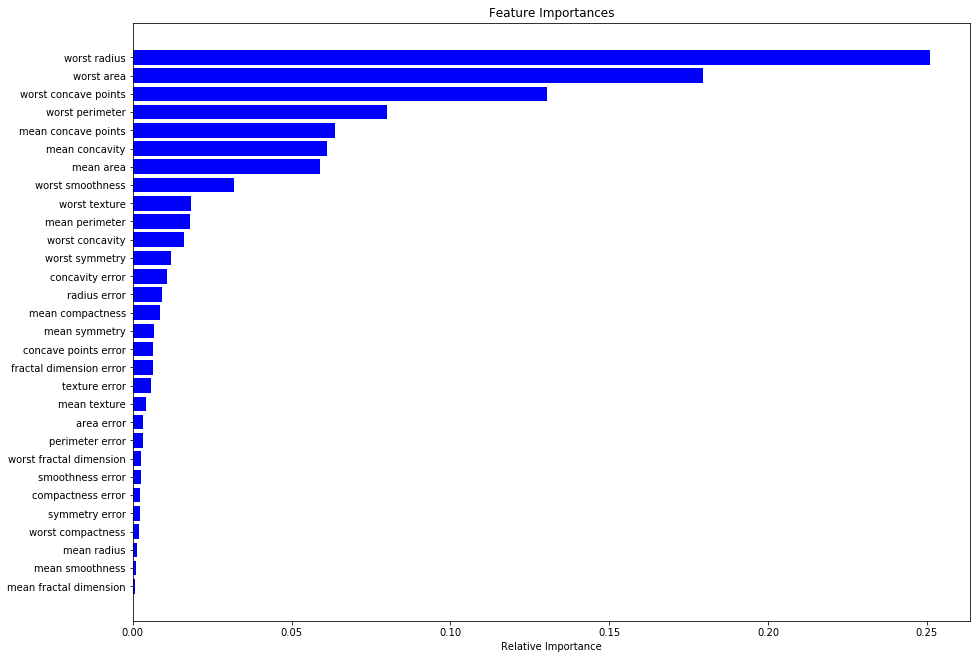

In [8]:
features = x_train.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.subplots(figsize=(15, 11))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

7. Run the cell below.  Do the splits make sense when comparing to the feature importances?  What does the top line of each box indicate?  What about samples?

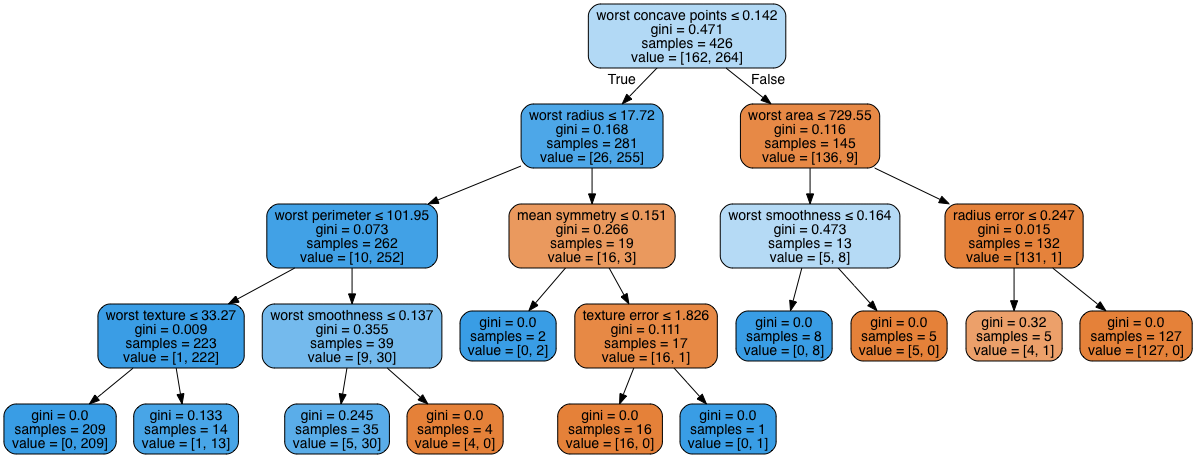

In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus

# Creates tree graph output, used in the CART function
def jupyter_graphviz(m, **kwargs):
    dot_data = StringIO()
    export_graphviz(m, dot_data, **kwargs)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

jupyter_graphviz(cart, filled=True, rounded=True, special_characters=True, feature_names=x_train.columns)

# The top line indicates which feature the model is being split on and by what threshold.  The 
# samples indicates how many data points are in the current split at that box.  
# The first split on worst concave points <= 0.142 makes sense as the random forest model
# suggests this is the most important feature but not all the splits frequency in our CART
# model show up as much as the random forest model would suggest.  For example, the random
# forest model indicates that 'mean perimeter' would be the second most important feature
# but our CART model does not use that feature as something to split our data on.

8. In the cell below, create a confusion matrix on our CART model.  Does anything standout to you when analyzing it?

In [10]:
from sklearn.metrics import confusion_matrix

## Confusion Matrix!
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_test, y_pred_cart),
                             columns=['Predicted Malignant','Predicted Benign'],
                             index=['Actual Malignant','Actual Benign'])
print ('Confusion matrix of test data is: \n', ConfusionMatrix)

# The model itself does not seem to overpredict Benign values or Malignant values.  The most worrisome values
# of predicting Benign when actually malignant of 6 is a relatively low value as well as when the model 
# predicts Malignant when actually Benign being only 3.  If the model predicted a large amount of Benigns
# when actually Malignant, the model would not warrant being used even if the model itself is very accurate.

Confusion matrix of test data is: 
                   Predicted Malignant  Predicted Benign
Actual Malignant                   44                 6
Actual Benign                       3                90
